In [1]:
import pandas as pd
import numpy as np
avo=pd.read_csv("avocado.csv", index_col="Unnamed: 0")

In [2]:
avo.head()
avo.shape
avo.columns
avo.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 16468 entries, 0.0 to nan
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.8+ MB


In [3]:
avo.isnull().sum()
avo.dropna(inplace=True)

In [4]:
avo.isnull().sum()
avo.shape

(1517, 13)

<AxesSubplot:>

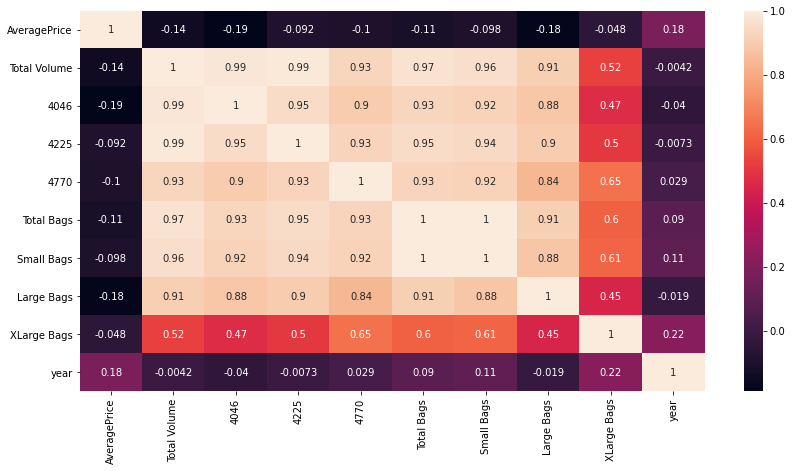

In [5]:
corrmat=avo.corr()
import matplotlib.pyplot as plt
plt.figure (figsize=(14,7))
import seaborn as sns
sns.heatmap(corrmat,annot=True)

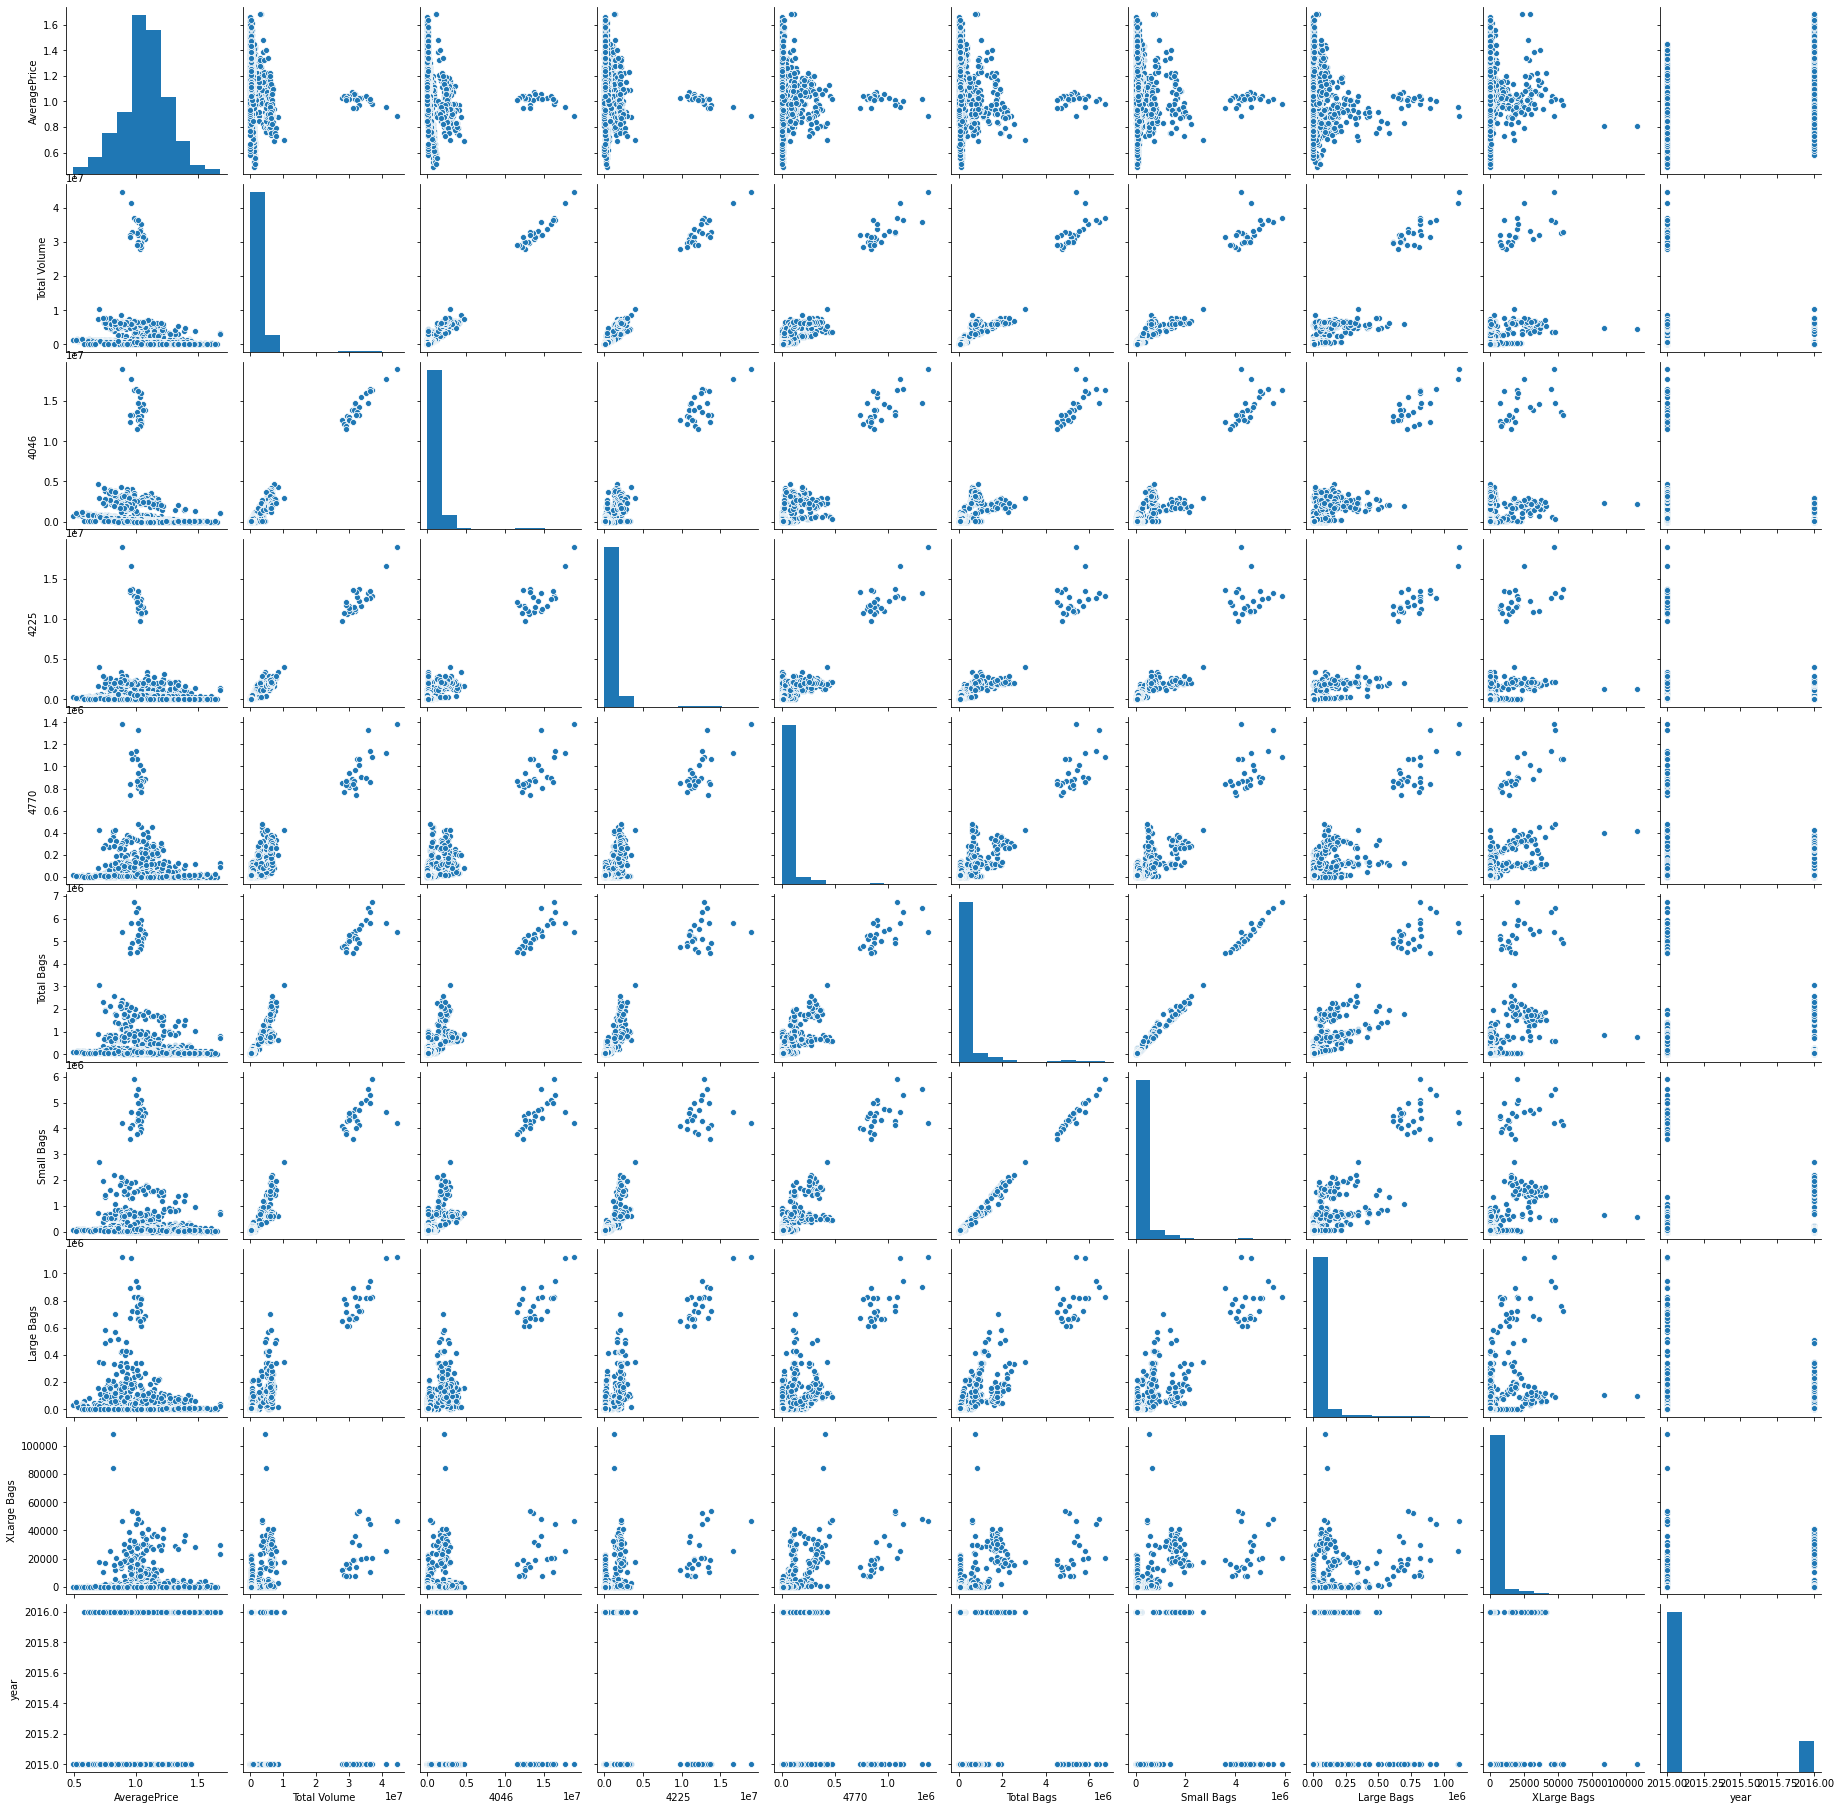

In [6]:
import seaborn as sns
sns.pairplot(avo)
plt.show()

In [7]:
print(" Observation from correlation: corresponding to our target variable Average Price, independent variable like total volume, Total number of avocados with PLU 4046 sold,Total number of avocados with PLU 4225 sold,Total number of avocados with PLU 4770 sold,total bags, small bags, large bags, Xlarge bags are negatively corelated ""\n""year is postively corelated")

 Observation from correlation: corresponding to our target variable Average Price, independent variable like total volume, Total number of avocados with PLU 4046 sold,Total number of avocados with PLU 4225 sold,Total number of avocados with PLU 4770 sold,total bags, small bags, large bags, Xlarge bags are negatively corelated 
year is postively corelated


In [9]:
avo.columns
avo.drop(columns=["Date", "type"], inplace=True)
avo.describe(include="all")

KeyError: "['Date' 'type'] not found in axis"

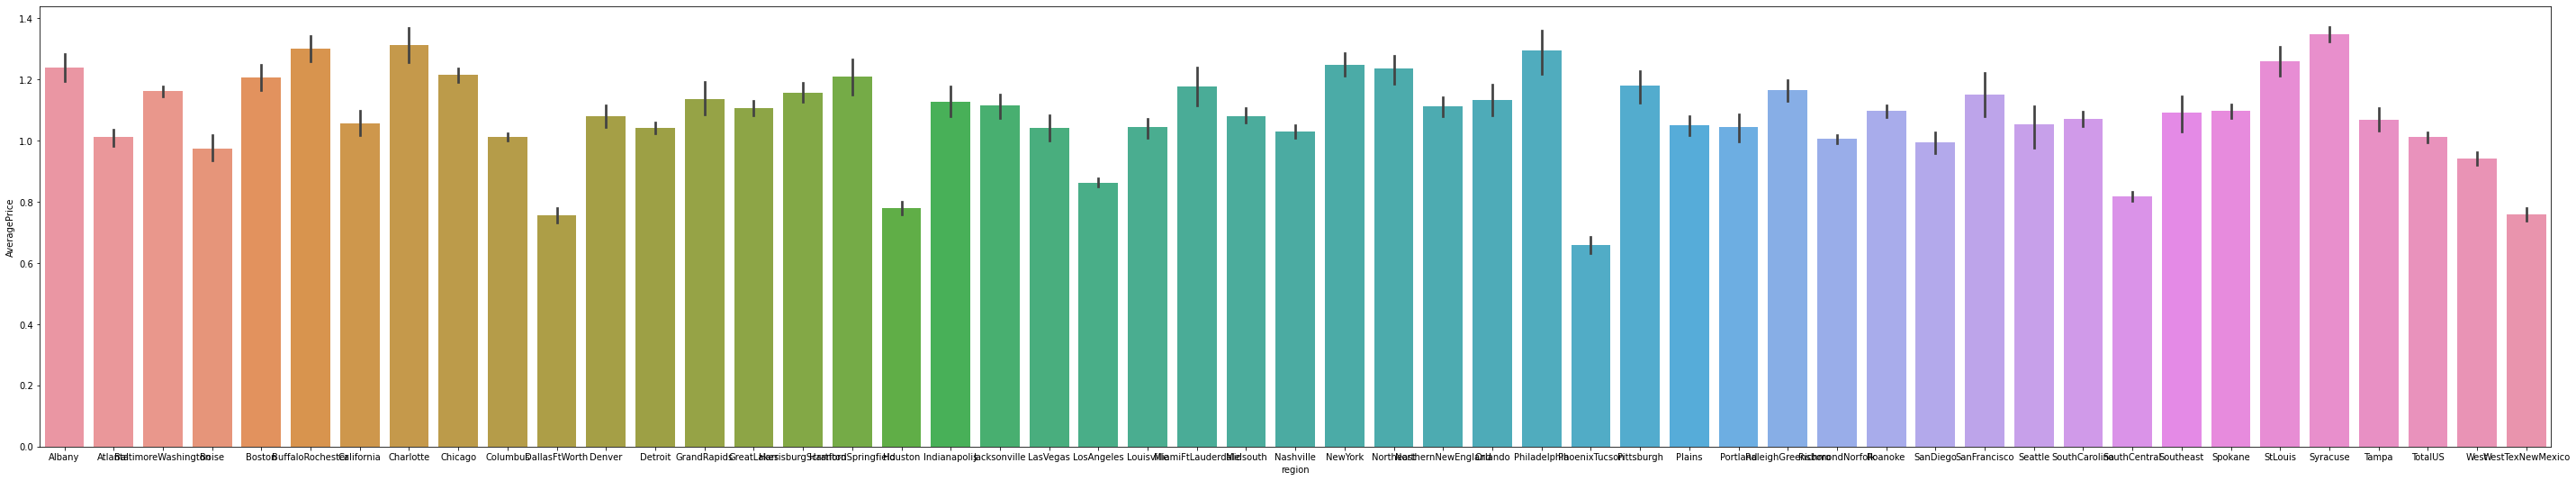

In [10]:
avo.region.value_counts()
plt.figure(figsize=(50, 9))
sns.barplot(x="region",y="AveragePrice", data=avo, )
plt.show()

In [11]:
maximum=avo.AveragePrice.max()
avo.loc[avo["AveragePrice"]>=1.68, ["AveragePrice", "region"]]
print(" In California region the Average price is highest")

 In California region the Average price is highest


In [12]:
minimum=avo.AveragePrice.min()
avo.loc[avo["AveragePrice"]<=.49, ["AveragePrice", "region"]]
print(" In PhoenixTucson region the Average price is lowest")

 In PhoenixTucson region the Average price is lowest


In [13]:
mean_avg_price=avo.AveragePrice.mean()
print("Mean of Average price is:", mean_avg_price)

Mean of Average price is: 1.0749901120632825


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
avo["region"]=le.fit_transform(avo["region"])

In [9]:
avo.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [15]:
avo.drop(columns=["type", "Date"], inplace=True)

In [16]:
import numpy as np
for col in avo.columns:
    if avo[col].skew()>.55:
        avo[col]=np.log1p(avo[col])  

In [11]:
avo.drop(columns=["year"], inplace=True)

In [19]:
avo.skew(), avo.shape

(AveragePrice   -0.109444
 Total Volume    0.442500
 4046           -0.160268
 4225            0.184436
 4770           -0.355508
 Total Bags      0.368284
 Small Bags      0.409053
 Large Bags     -0.912766
 XLarge Bags     0.348073
 region          0.288146
 dtype: float64,
 (1517, 10))

In [17]:
from scipy.stats import zscore
z=abs(zscore(avo))
avo2=avo[(z<3).all(axis=1)]

In [18]:
avo.shape,avo2.shape

((1517, 10), (1502, 10))

In [22]:
X=avo2.drop(columns="AveragePrice")
y=avo2.AveragePrice

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(X)
X=pd.DataFrame(df_x, columns=X.columns)

In [24]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model=[LinearRegression(), Ridge(), Lasso()]
for m in model:
    X_train, X_test, y_train, y_test=split(X,y, random_state=123, test_size=.2)
    m.fit(X_train, y_train)
    m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("for model:", m,"r2_score:", r2_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    
print("*********************************************")

for model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) r2_score: 0.3214585758949462
mse: 0.12051293189869237
rmse: 0.1562870550277072
for model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) r2_score: 0.32359158416629996
mse: 0.12038814919775141
rmse: 0.15604121596469778
for model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) r2_score: -1.2314480417829898e-05
mse: 0.14383973881259096
rmse: 0.18973065182827067
*********************************************


In [34]:
lr=LinearRegression()
max_r2=0
for r in range(42,200):
    X_train, X_test, y_train, y_test=split(X,y, random_state=r, test_size=.2)
    lr.fit(X_train, y_train)
    lr.score(X_train, y_train)
    y_pred=lr.predict(X_test)
    r2=r2_score(y_test, y_pred)
    if r2>max_r2:
        max_r2=r2
        final_r=r
    
print("Max_r2_score:",r2,"Corresponding with r:",final_r)

Max_r2_score: 0.43124371354411706 Corresponding with r: 87


In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv=10, scoring="r2").mean()

0.025275686657727624

In [37]:
X_train, X_test, y_train, y_test=split(X,y, random_state=87, test_size=.2)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
y_pred=lr.predict(X_test)
r2=r2_score(y_test, y_pred)

In [44]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
adb=AdaBoostRegressor(base_estimator= lr, n_estimators=500,random_state=87)
adb.fit(X_train,y_train)
y_pred=adb.predict(X_test)
r2_score(y_test, y_pred)

0.43016747319326243

In [47]:
from sklearn.externals import joblib
joblib.dump(adb, "avocado_reg.pkl")

['avocado_reg.pkl']

In [19]:
X=avo2.drop(columns="region")
y=avo2.region

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(X)
X=pd.DataFrame(df_x, columns=X.columns)

In [21]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
model=[LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
for m in model:
    X_train, X_test, y_train, y_test=split(X,y, random_state=123, test_size=.2)
    m.fit(X_train, y_train)
    m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("*********************************************")
    print()
    print()
    

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) acc_score: 0.9036544850498339
mse: 1.9933554817275747
rmse: 7.45306465539345
*********************************************


for model: GaussianNB(priors=None, var_smoothing=1e-09) acc_score: 0.9102990033222591
mse: 2.0730897009966776
rmse: 7.712009015585913
*********************************************


for model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) acc_score: 0.8970099667774086
mse: 1.9401993355481728
rmse: 7.104348020567559
*****************

In [23]:
from sklearn.model_selection import GridSearchCV
rfr=RandomForestClassifier()
parameters={"random_state" : range(42,200)}
clf=GridSearchCV(rfr, parameters)
clf.fit(X_train,y_train)
clf.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'random_state': 130}

In [25]:
rfr=RandomForestClassifier(random_state=130)
rfr.fit(X_train, y_train)
y_pred=rfr.predict (X_test)
print("acc_score:", accuracy_score(y_test, y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

acc_score: 0.9534883720930233
mse: 1.0764119601328903
rmse: 5.6291835679071625


In [ ]:
from sklearn.externals import joblib
joblib.dump (rfr, "Avocado_clss.pkl")